# Arguments vs. Key word Arguments
All of the functions we've made have used arguments for the inputs of the function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def foo(x, y):
    return x + y

In [3]:
foo(3, 7)

10

But what if there's one input I keep using over and over again, I want to make it so that the program has a default value for something, but could be changed if I wanted.

In [4]:
def bar(x, y = 2):
    return x+y

In [5]:
bar(10)

12

In [6]:
bar(2, 5)

7

y here is a key word argument. Python is picky and requires that any keyword arguments be after positional arguments

In [7]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 5'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 5
 baseball.py
 efld.py
 long_ball.py
'Lorenz Solutions.png'
'Meth of Computational Physics - 10172018 - 1121 AM.zip'
 pendulum.py
 __pycache__/
 rk2.py
'Table of Contents.html'
 tan_vec.py


In [8]:
# %load rk2.py
import numpy as np
def rk2_foo(y0, deriv_func, t0 = 0, tf = 10, dt = 0.01):
    """
    General RK2 solver

    Inputs
    ----------
    y0:         Starting 'y' values. y0 Can be an array/list of any number of dimentions
    t0, tf:     Initial and Final independent variables
    dt:         Step size for the independent variable
    deriv_func: Derivative function that I want to solve for

    Output
    ----------
    t:  Array of independent variables
    y:  Array of dependent variables values. The first intex corresponds to the time step and the second corresponds to
        the dependent variable number
    """

    t = np.arange(t0, tf+dt, dt)
    n_steps = len(t)    # Number of steps to take

    y = np.zeros((n_steps, len(y0))) #Makes an array of zeros

    y[0,:] = y0 #Sets the first row in y to be the initial values.

    for n in range(n_steps-1):
        f = deriv_func(y[n,:],t[n])
        y_star = y[n,:] + 0.5 * dt * f
        #Now take the full step
        t_star = t[n] + 0.5 * dt
        f_star = deriv_func(y_star, t_star)
        y[n+1,:] = (y[n,:] + dt*f_star)
    return t, y


In [9]:
# %load baseball.py
import numpy as np
def baseball(w,t):
    """
    Finds the acceleration of a Baseball with forces from gravity and air resistance.

    Inputs
    ----------
    w:  Array of with the position and velocity of the ball
        w[0] = x (m)
        w[1] = y (m)
        w[2] = v_x (m/s)
        w[3] = v_y (m/s)

    t:  Dumby variable

    Output
    ----------
    foo: Array of velocities and accelerations
         foo[0] = v_x (m/s)
         foo[1] = v_y (m/s)
         foo[2] = a_x (m/s**2)
         foo[3] = a_y (m/s**2)
    """
    g = 9.8     # gravity (m/s**2)
    rho = 1.2   # Mass density of air (kg/m**3)
    a = 4.16e-3 # cross sectional area of a baseball (m**2)
    C_d = 0.5   # Drag coefficient
    M = 0.142   # Mass of a baseball (kg)

    alpha = 0.5 * rho * a * C_d / M

    v_mag = np.sqrt(w[2]**2 + w[3]**2) # Magnitude of the velocity

    foo = np.array([w[2], w[3], -alpha*v_mag*w[2], -g - alpha*v_mag * w[3]])
    return foo


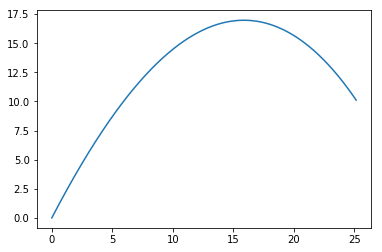

In [14]:
t, z = rk2_foo([0,0, 10, 20], baseball, tf = 3, dt = 0.0001)
plt.plot(z[:,0], z[:,1])

What if I don't know how many arguments I'll need? Then I can use,

    *args, **kwargs

In [15]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 4'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 4
'Error vs Run Time.png'  'Euler vs. RK2.png'   rk2_1d.py      Untitled.ipynb
 euler_1d.py             'READ ME.txt'         sky_diver.py


In [35]:
# %load sky_diver.py
def sky_diver(v, t, C_d = 5, rho = 1.2, M = 100):
    """
    Acceleration of an object falling from gravity, with air resistance.
    dv/dt = g - alpha * v**2

    Input
    ----------
    v:  Velocity of the object

    t:  Dumby variable put in so that euler/rk2 can handle it. There should be
        away to get rid of this but I don't know what it is yet so for now it stays in

    Output
    ----------
    a: Acceleration for a given velocity

    """
    g = 9.8         # Acceleration from gravity (m/s/s)
    #rho = 1.2       # Mass density of the air they're falling in (kg/m**3)
    a = 1.0         # cross-sectional area of the sky diver (m**2)
    #C_d = 1.0       # coefficient of drag
    #M = 100.0       # mass of the diver (kg)
    alpha = 0.5 * rho * a * C_d / M
    return g - alpha * abs(v)*v


In [36]:
# %load euler_1d.py
import numpy as np
def euler_1d_foo(y0, t0, tf, dt, deriv_func, **kwargs):
    """
    Numerically solve the first order ODE deriv_func using Eulers method

    Inputs
    ----------
    y0:         Starting dependent-variable value
    t0, tf:     Starting and ending independent-variable value
    dt:         Size of the step I want to take.
    deriv_func: Function that I am trying to numerically solve.

    Outputs
    ----------
    t: Array of independent-variable values
        t = [t[0], t[1], t[2], ..., t[n_steps]]
    y: Array of corresponding dependent-variable values
        y = [y[0], y[1], y[2], ..., y[n_steps]]
    """

    t = np.arange(t0, tf+dt, dt)   #starts at t0 and makes steps of size dt. Does not
                                   #get to tf. It gets as Close as it can to tf, but
                                   #will always stop short of it.
    n_steps = len(t)        #Number of steps to take
    y = np.zeros(n_steps)   #I want to make an array of zeros that I'll then put
                            #y-values into. This is a good practice because it
                            #forces the computer to allocate enough memory for the
                            #final answer and can prevent memory problems
 
    #Set the first element of the array to be our input starting value y0
    y[0] = y0
    for n in range(n_steps-1):
        f = deriv_func(y[n], t[n],**kwargs)  #Evaluate the function f(y,t)
        y[n+1] = (y[n] + dt * f)    #This is the Euler's method part.
    return t, y

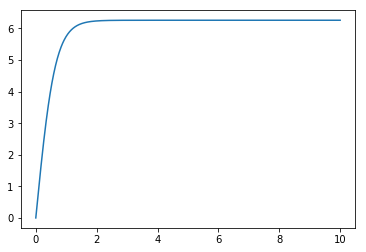

In [38]:
t, y = euler_1d_foo(0, 0, 10, 0.01, sky_diver,C_d = 100, rho = .5)
plt.plot(t, y)

37
